In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('IACC.csv')
df.head()

,year,BST,FVR,AST,IACC
0,1999-01-01,3699,596,196,246
1,2000-01-01,1685,1058,286,298
2,2001-01-01,1377,534,282,219
3,2002-01-01,1598,302,385,214
4,2003-01-01,1369,341,298,285


In [3]:
df['year'] = pd.to_datetime(df['year'])

## BST

In [4]:
tmp1 = df[['year','BST']].reset_index(drop=True)

In [5]:
tmp1 = tmp1.rename(columns={'year':'ds', 'BST':'y'})

In [6]:
tmp1.tail()

,ds,y
18,2017-01-01,1493
19,2018-01-01,1594
20,2019-01-01,1333
21,2020-01-01,1012
22,2021-01-01,1162


<AxesSubplot:xlabel='ds'>

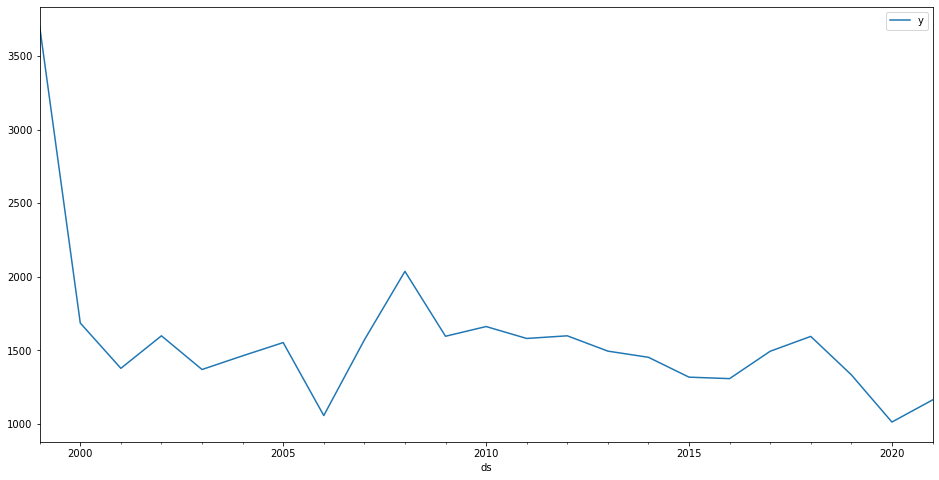

In [7]:
tmp1.plot(x='ds',y='y',figsize=(16,8))

In [8]:
prophet = Prophet()
prophet.fit(tmp1)

future_data1 = prophet.make_future_dataframe(periods=5,freq='Y')
forecast_data1 = prophet.predict(future_data1)

forecast_data1.tail()

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 17.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
23,2021-12-31,-1758.600536,664.759659,1732.904790,-1758.600943,-1758.600162,2946.837784,2946.837784,2946.837784,2946.837784,2946.837784,2946.837784,0.0,0.0,0.0,1188.237249
24,2022-12-31,-1792.540818,585.216520,1689.791048,-1792.542329,-1792.539452,2904.907232,2904.907232,2904.907232,2904.907232,2904.907232,2904.907232,0.0,0.0,0.0,1112.366413
25,2023-12-31,-1826.481101,456.237173,1588.681511,-1826.484031,-1826.478388,2842.434929,2842.434929,2842.434929,2842.434929,2842.434929,2842.434929,0.0,0.0,0.0,1015.953828
26,2024-12-31,-1860.514370,567.390698,1667.289330,-1860.518969,-1860.509870,2968.138665,2968.138665,2968.138665,2968.138665,2968.138665,2968.138665,0.0,0.0,0.0,1107.624295
27,2025-12-31,-1894.454653,454.997260,1628.842034,-1894.461076,-1894.447970,2946.837784,2946.837784,2946.837784,2946.837784,2946.837784,2946.837784,0.0,0.0,0.0,1052.383131


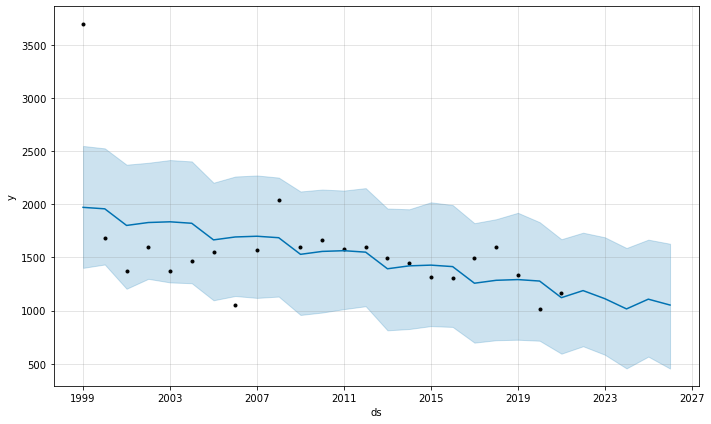

In [10]:
fig1 = prophet.plot(forecast_data1)
plt.savefig('BST1.png')

In [123]:
y = tmp1.y.values
y_pred = forecast_data1.yhat.values[:-5]

r2 = r2_score(y,y_pred)
r2

0.2312735124787434

In [124]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y, y_pred)

0.0464756666289963

## FVR

In [11]:
tmp2 = df[['year','FVR']].reset_index(drop=True)

In [12]:
tmp2 = tmp2.rename(columns={'year':'ds', 'FVR':'y'})

In [13]:
tmp2.head()

,ds,y
0,1999-01-01,596
1,2000-01-01,1058
2,2001-01-01,534
3,2002-01-01,302
4,2003-01-01,341


<AxesSubplot:xlabel='ds'>

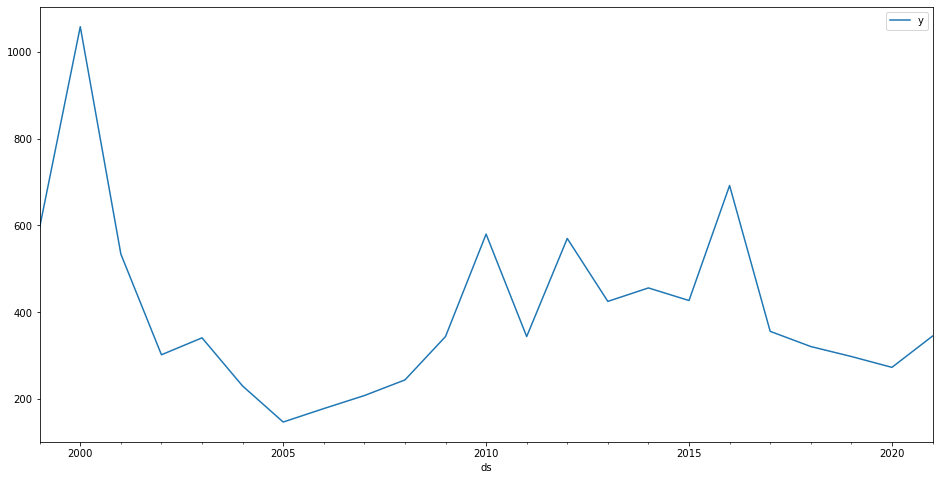

In [14]:
tmp2.plot(x='ds',y='y',figsize=(16,8))

In [15]:
prophet = Prophet()
prophet.fit(tmp2)

future_data2 = prophet.make_future_dataframe(periods=5,freq='Y')
forecast_data2 = prophet.predict(future_data2)

forecast_data2.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 17.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
23,2021-12-31,112.581859,273.607731,768.451365,112.581826,112.581889,403.258606,403.258606,403.258606,403.258606,403.258606,403.258606,0.0,0.0,0.0,515.840464
24,2022-12-31,107.318156,333.984180,799.656923,107.318026,107.318271,464.462204,464.462204,464.462204,464.462204,464.462204,464.462204,0.0,0.0,0.0,571.780360
25,2023-12-31,102.054453,367.149662,872.253999,102.054210,102.054695,529.875753,529.875753,529.875753,529.875753,529.875753,529.875753,0.0,0.0,0.0,631.930206
26,2024-12-31,96.776329,207.196497,688.327946,96.775937,96.776709,346.349250,346.349250,346.349250,346.349250,346.349250,346.349250,0.0,0.0,0.0,443.125580
27,2025-12-31,91.512626,276.581792,742.143948,91.512081,91.513160,403.258606,403.258606,403.258606,403.258606,403.258606,403.258606,0.0,0.0,0.0,494.771232


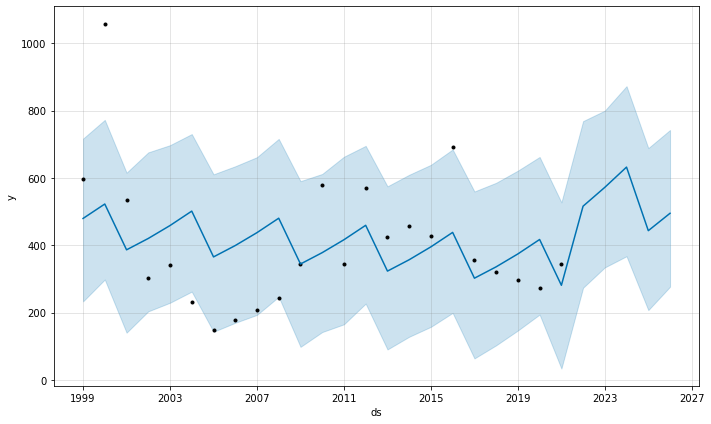

In [16]:
fig1 = prophet.plot(forecast_data2)
plt.savefig('FVR1.png')

In [131]:
y = tmp2.y.values
y_pred = forecast_data2.yhat.values[:-5]

r2 = r2_score(y,y_pred)
r2

0.10475258497093831

In [132]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y, y_pred)

0.21013552596393656

## AST

In [17]:
tmp3 = df[['year','AST']].reset_index(drop=True)

In [18]:
tmp3 = tmp3.rename(columns={'year':'ds', 'AST':'y'})

In [19]:
tmp3.tail()

,ds,y
18,2017-01-01,632
19,2018-01-01,577
20,2019-01-01,547
21,2020-01-01,337
22,2021-01-01,342


<AxesSubplot:xlabel='ds'>

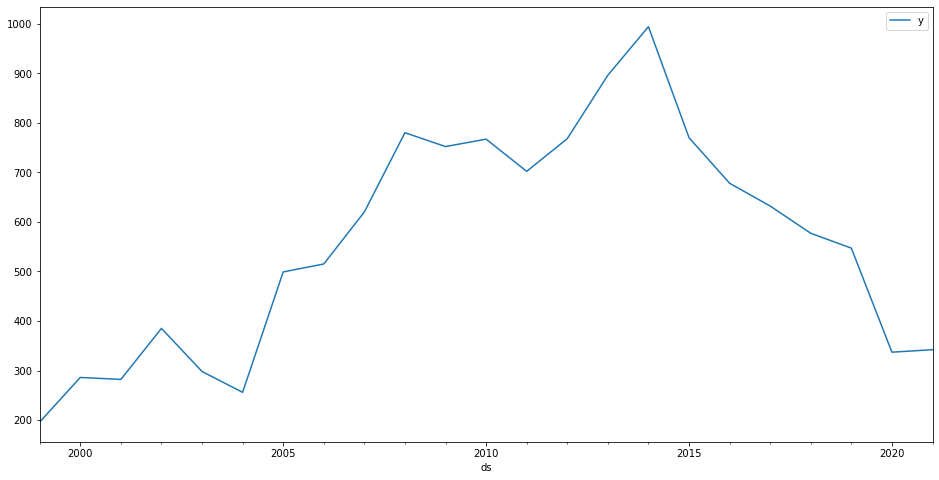

In [20]:
tmp3.plot(x='ds',y='y',figsize=(16,8))

In [21]:
prophet = Prophet()
prophet.fit(tmp3)

future_data3 = prophet.make_future_dataframe(periods=5,freq='Y')
forecast_data3 = prophet.predict(future_data3)

forecast_data3.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 17.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
23,2021-12-31,217.407750,389.347557,912.783041,217.407750,217.407750,429.895677,429.895677,429.895677,429.895677,429.895677,429.895677,0.0,0.0,0.0,647.303428
24,2022-12-31,231.911080,367.570819,890.030282,231.911079,231.911081,397.876576,397.876576,397.876576,397.876576,397.876576,397.876576,0.0,0.0,0.0,629.787656
25,2023-12-31,246.414410,339.562290,854.584529,246.414408,246.414412,363.040218,363.040218,363.040218,363.040218,363.040218,363.040218,0.0,0.0,0.0,609.454628
26,2024-12-31,260.957475,460.621055,976.307001,260.957472,260.957478,459.052522,459.052522,459.052522,459.052522,459.052522,459.052522,0.0,0.0,0.0,720.009997
27,2025-12-31,275.460805,456.477066,956.649144,275.460801,275.460810,429.895677,429.895677,429.895677,429.895677,429.895677,429.895677,0.0,0.0,0.0,705.356483


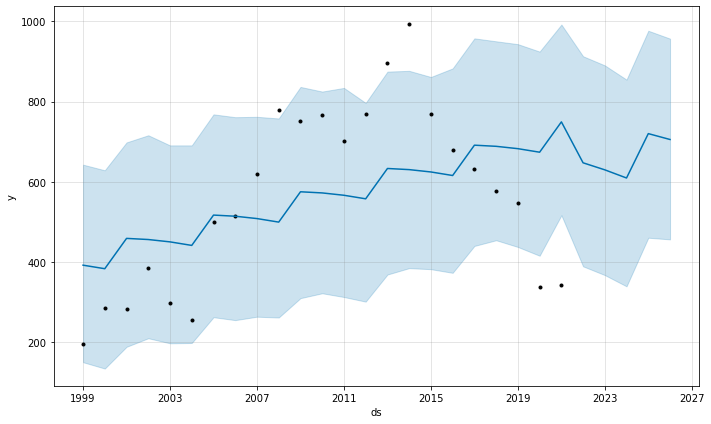

In [22]:
fig3 = prophet.plot(forecast_data3)
plt.savefig('AST1.png')

In [139]:
y = tmp3.y.values
y_pred = forecast_data3.yhat.values[:-5]

r2 = r2_score(y,y_pred)
r2

0.20563929900308708

In [140]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y, y_pred)

0.14760640457894714

## IACC

In [141]:
tmp4 = df[['year','IACC']].reset_index(drop=True)

In [142]:
tmp4 = tmp4.rename(columns={'year':'ds', 'IACC':'y'})

In [143]:
tmp4.tail()

,ds,y
18,2017-01-01,312
19,2018-01-01,300
20,2019-01-01,298
21,2020-01-01,183
22,2021-01-01,168


<AxesSubplot:xlabel='ds'>

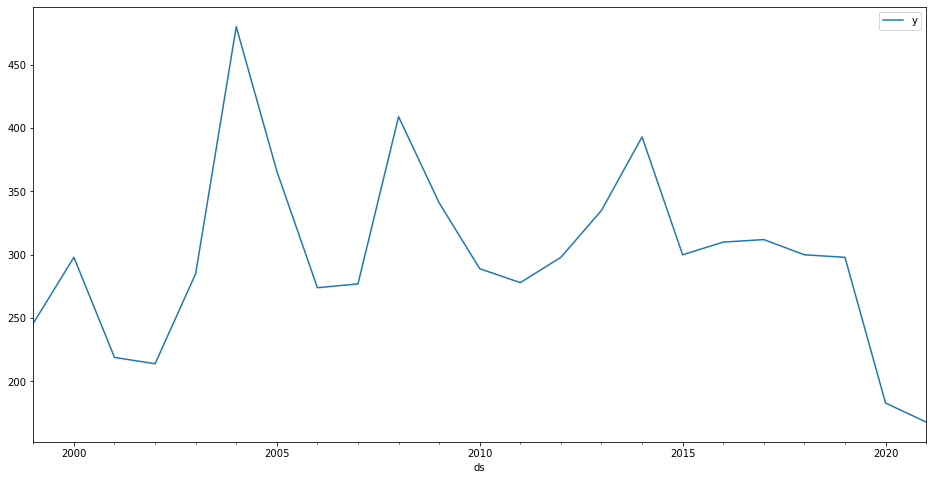

In [144]:
tmp4.plot(x='ds',y='y',figsize=(16,8))

In [152]:
Prophet?

In [145]:
prophet = Prophet()
prophet.fit(tmp4)

future_data4 = prophet.make_future_dataframe(periods=5,freq='Y')
forecast_data4 = prophet.predict(future_data4)

forecast_data4.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 17.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
23,2021-12-31,100.840927,242.579120,419.613220,100.840927,100.840927,228.411798,228.411798,228.411798,228.411798,228.411798,228.411798,0.0,0.0,0.0,329.252725
24,2022-12-31,99.568150,254.500983,434.691019,99.568149,99.568150,246.366452,246.366452,246.366452,246.366452,246.366452,246.366452,0.0,0.0,0.0,345.934601
25,2023-12-31,98.295372,277.332862,446.343494,98.295371,98.295373,266.210420,266.210420,266.210420,266.210420,266.210420,266.210420,0.0,0.0,0.0,364.505792
26,2024-12-31,97.019108,224.310739,397.743392,97.019107,97.019110,212.372675,212.372675,212.372675,212.372675,212.372675,212.372675,0.0,0.0,0.0,309.391783
27,2025-12-31,95.746331,243.181415,413.778112,95.746329,95.746333,228.411798,228.411798,228.411798,228.411798,228.411798,228.411798,0.0,0.0,0.0,324.158129


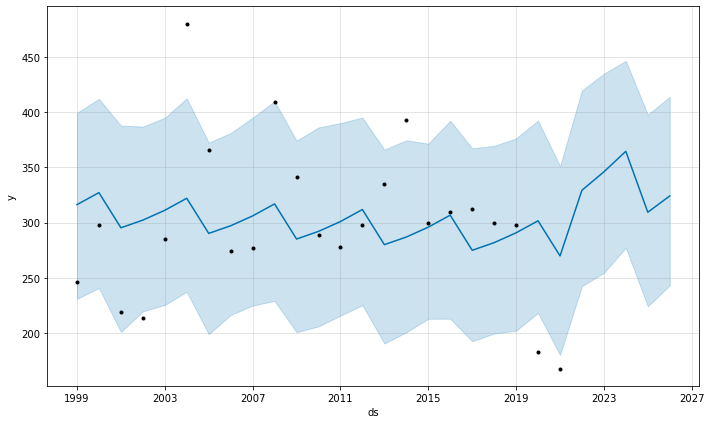

In [146]:
fig4 = prophet.plot(forecast_data4)

In [147]:
y = tmp4.y.values
y_pred = forecast_data4.yhat.values[:-5]

r2 = r2_score(y,y_pred)
r2

0.04943497751960324

In [150]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y, y_pred)

0.053922897103803706